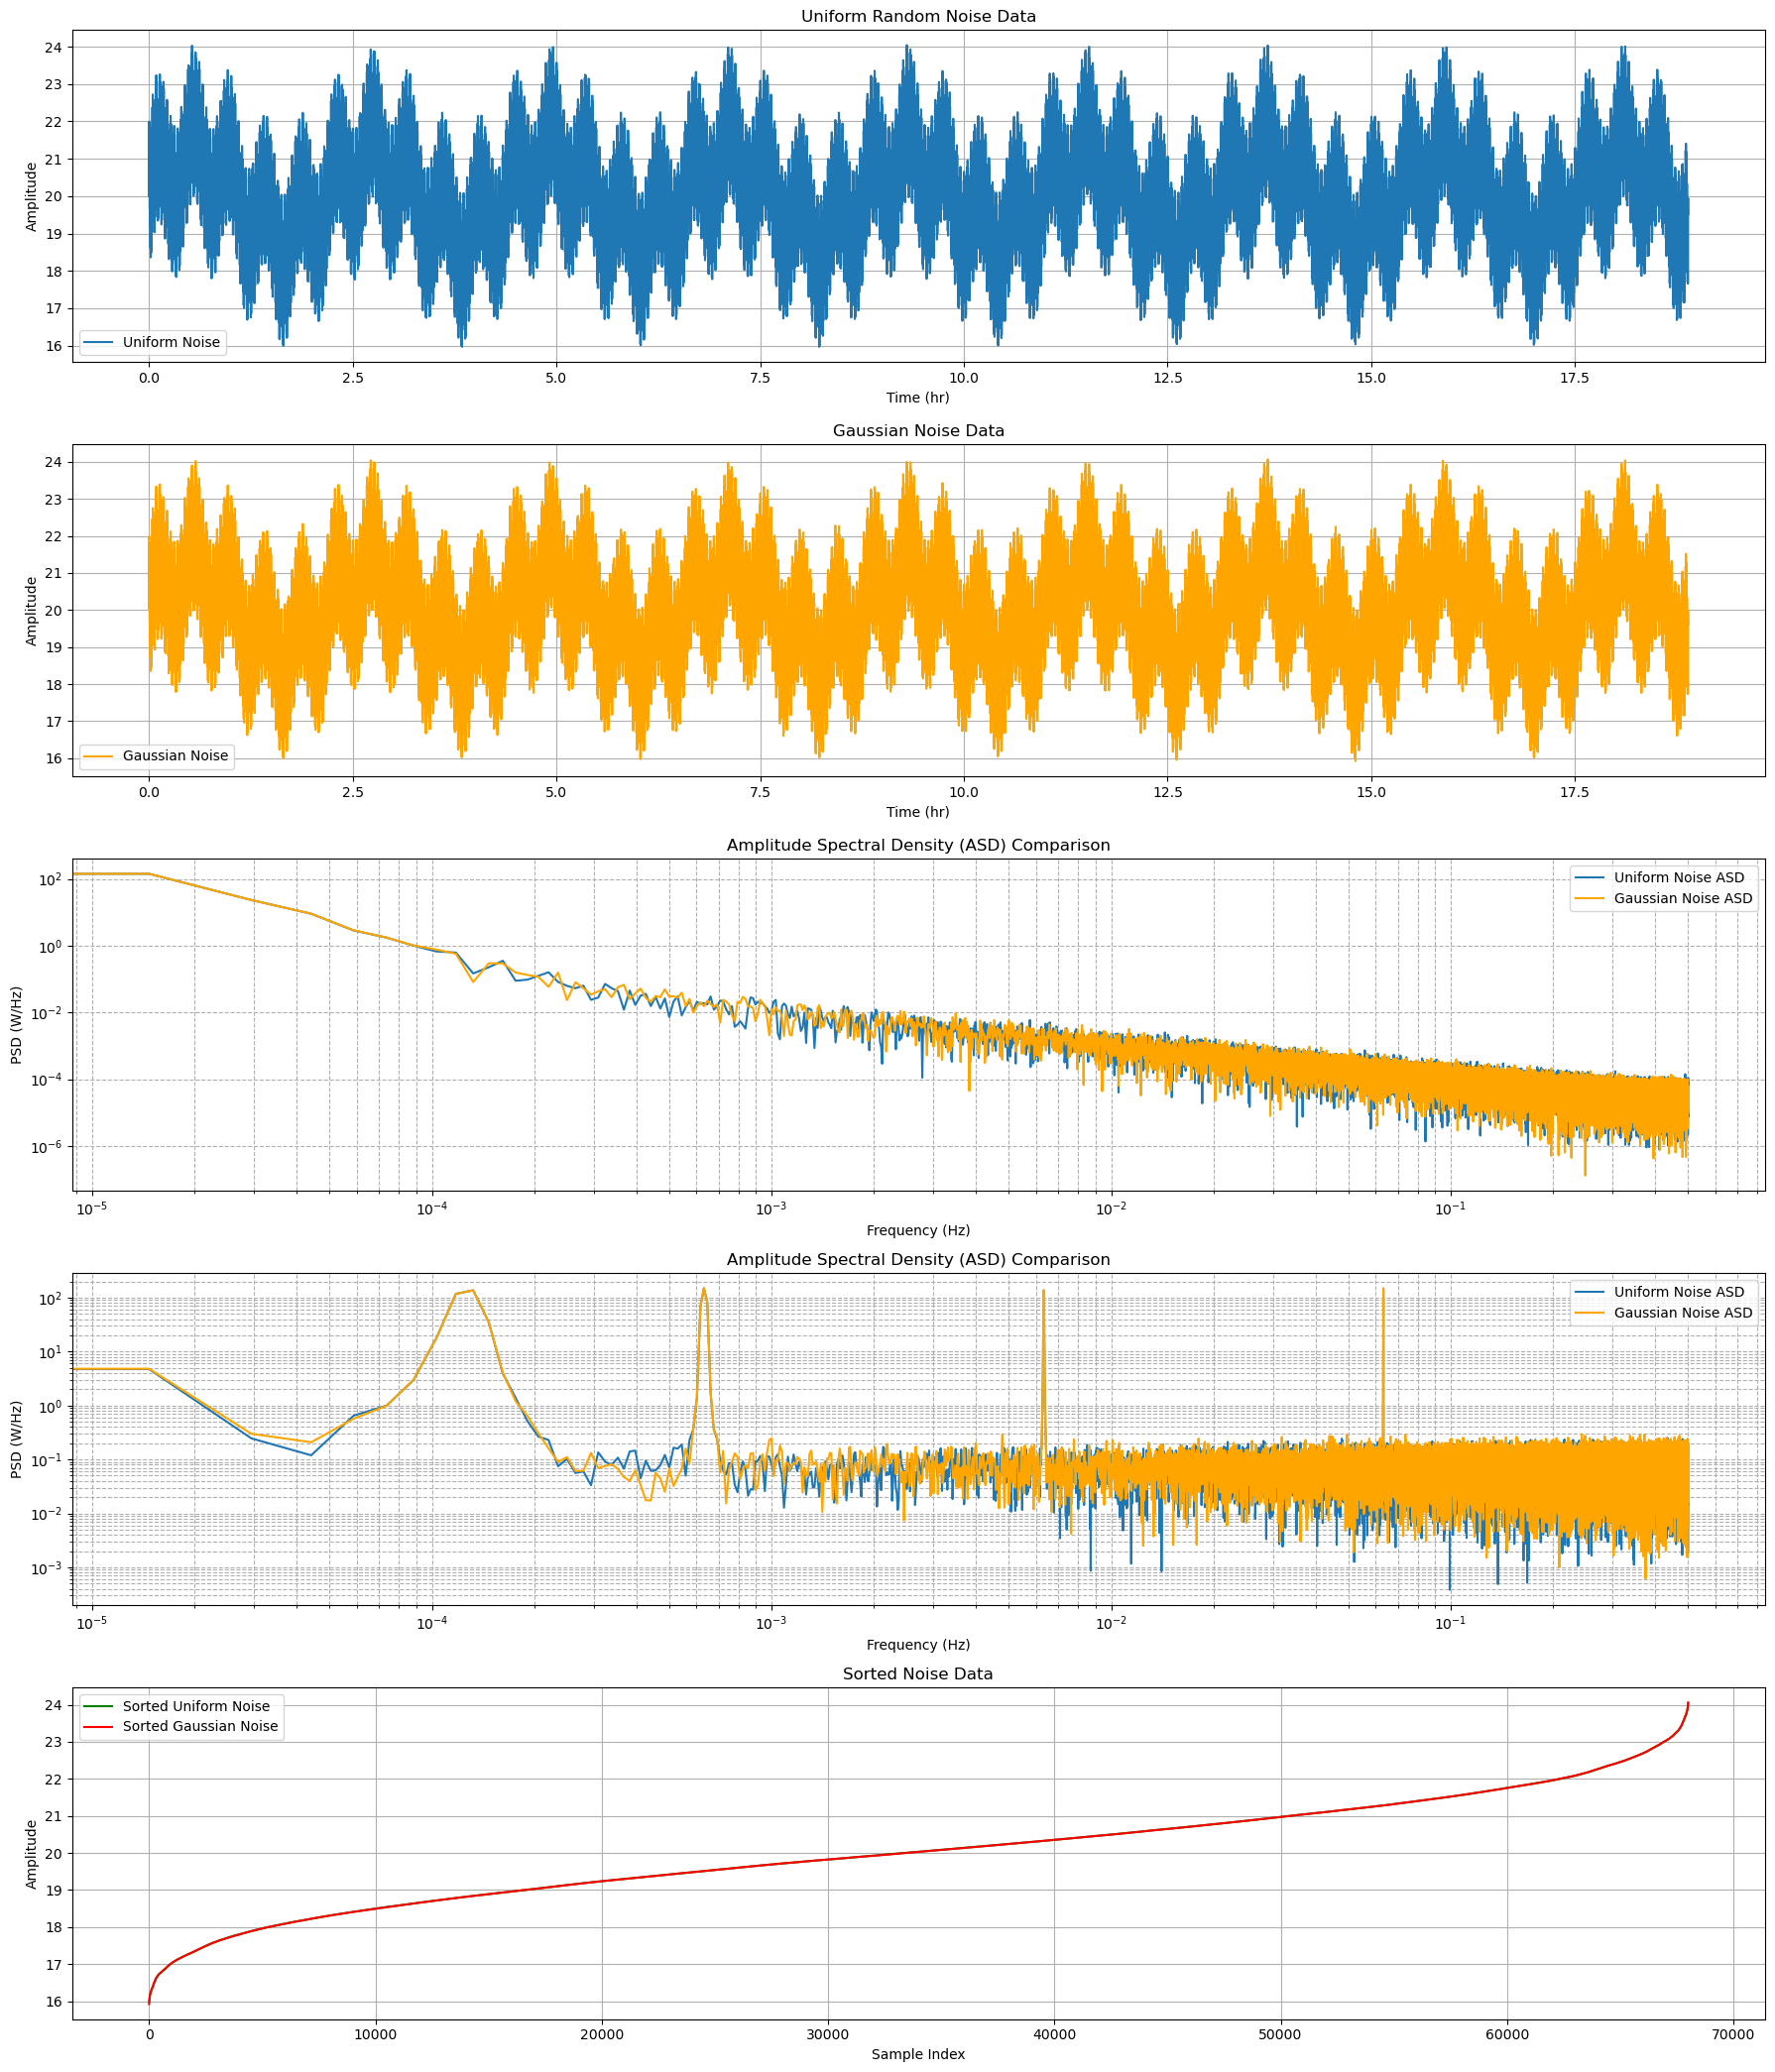

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, find_peaks
import os
# Parameters
Time = 68000
Ntime = Time + 1
Nseg=68000
fs=1
NoiseFactor=1
SinCosfactor=1
piFactor=4
# Generate random noise data (Uniform distribution)
time_s = np.linspace(0, Ntime, num=Ntime, endpoint=False)
array = np.random.rand(Ntime)
rand_p1K = NoiseFactor * 0.1 * (array * 2. - 1.)
sn= SinCosfactor *np.sin(time_s/(100*piFactor*np.pi)) + SinCosfactor * np.sin(time_s/(20*piFactor*np.pi))
cn= SinCosfactor * np.cos(time_s/(2*piFactor*np.pi)) + SinCosfactor * np.cos(time_s/(0.2*piFactor*np.pi))
data_p1K = 20. + rand_p1K + sn + cn
# Generate Gaussian (Normal) noise data
mean = 0
stdp1 = 0.065
Normalp1 = NoiseFactor*np.random.normal(mean, stdp1, size=Ntime)
Ndata_p1K = 20. + Normalp1 + sn + cn
# Sort the uniform and Gaussian noise data
ABp1K = np.abs(data_p1K)
SHp1K = np.sort(ABp1K)
AB_Ndata_p1K = np.abs(Ndata_p1K)
SH_Ndata_p1K = np.sort(AB_Ndata_p1K)
# Compute the Power Spectral Density (PSD) using Welch's method
fs = 1.0  # Sampling frequency (Hz), assuming 1 Hz for simplicity
frequencies, psd_uniform = welch(data_p1K, fs=fs, nperseg=Nseg)
frequencies, psd_sorted_uniform = welch(SHp1K, fs=fs, nperseg=Nseg)
frequencies, psd_gaussian = welch(Ndata_p1K, fs=fs, nperseg=Nseg)
frequencies, psd_sorted_gaussian = welch(SH_Ndata_p1K, fs=fs, nperseg=Nseg)
# Calculate the Amplitude Spectral Density (ASD) from the PSD
asd_uniform = np.sqrt(psd_uniform)
asd_sorted_uniform = np.sqrt(psd_sorted_uniform)
asd_gaussian = np.sqrt(psd_gaussian)
asd_sorted_gaussian = np.sqrt(psd_sorted_gaussian)
#change time to hr
time_s=time_s/3600
# Plot the results
plt.figure(figsize=(18, 21))
# Plot the uniform noise data
plt.subplot(5, 1, 1)
plt.plot(time_s, data_p1K, label='Uniform Noise')
plt.title('Uniform Random Noise Data')
plt.xlabel('Time (hr)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
# Plot the Gaussian noise data
plt.subplot(5, 1, 2)
plt.plot(time_s, Ndata_p1K, label='Gaussian Noise', color='orange')
plt.title('Gaussian Noise Data')
plt.xlabel('Time (hr)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
# Plot the PSD comparison
plt.subplot(5, 1, 3)
plt.loglog(frequencies, psd_uniform, label='Uniform Noise PSD')
plt.loglog(frequencies, psd_gaussian, label='Gaussian Noise PSD', color='orange')
plt.plot(frequencies[peaks_psd_uniform], psd_uniform[peaks_psd_uniform], 'rx', label='Uniform PSD Peaks')
plt.plot(frequencies[peaks_psd_gaussian], psd_gaussian[peaks_psd_gaussian], 'bx', label='Gaussian PSD Peaks')
plt.title('Power Spectral Density (PSD) Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (W/Hz)')
plt.grid(True, which='both', ls='--')
plt.legend()
# Plot the ASD comparison
plt.subplot(5, 1, 4)
plt.loglog(frequencies, asd_uniform, label='Uniform Noise ASD')
plt.loglog(frequencies, asd_gaussian, label='Gaussian Noise ASD', color='orange')
# plt.plot(frequencies[peaks_asd_uniform], asd_uniform[peaks_asd_uniform], 'rx', label='Uniform ASD Peaks')
# plt.plot(frequencies[peaks_asd_gaussian], asd_gaussian[peaks_asd_gaussian], 'bx', label='Gaussian ASD Peaks')
plt.title('Amplitude Spectral Density (ASD) Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (W/Hz)')
plt.grid(True, which='both', ls='--')
plt.legend()
# Plot the sorted noise data for comparison
plt.subplot(5, 1, 5)
plt.plot(SHp1K, label='Sorted Uniform Noise', color='green')
plt.plot(SH_Ndata_p1K, label='Sorted Gaussian Noise', color='red')
plt.title('Sorted Noise Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## plt.figure(figsize=(10,8))
plt.plot(frequencies, asd_uniform, 'r-',label = "Original Uniform Noise ASD")
plt.plot(frequencies, asd_sorted_uniform, 'g-',label = "Sorted Uniform Noise ASD")
plt.yscale("log")
plt.xscale("log")
#plt.xlim(1e-5, 1)
#plt.ylim(1e-1, 100)
plt.title("PSD from Random + Sin + Cos")
plt.xlabel("Freq (Hz)")
plt.ylabel("Temperature Output Data (˚K/Hz)")
plt.legend()
plt.grid(visible=None, which='both', axis='both')
plt.show()